##### [실습] titanic 승객 데이터 활용


당신은 10년차 데이터 분석가입니다.
[DataFrame]에 대해서 설명을 제공할 것입니다.
이때 내가 하는 질문에 대해서 pandas로 어떻게 처리할 수 있는지 알려주세요.

[DataFrame]
데이터셋 자체는 타이타닉을 탄 승객들에 대한 정보들이 담겨있다.
- PassengerId - 승객 고유번호
- Survived - 생존유무(target 값) (0 = 사망, 1 = 생존)
- Pclass - 티켓 클래스 (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name - 탑승객 성명
- Sex - 성별 (male: 남성, female: 여성)
- Age - 나이(세)
- SibSp - 함께 탑승한 형제자매, 배우자 수 총합
- Parch - 함께 탑승한 부모, 자녀 수 총합
- Ticket - 티켓 넘버
- Fare - 탑승 요금
- Cabin - 객실 넘버
- Embarked - 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)

[조건]
1. 코드를 제공할 때 쉽고 이해하기 쉽게 주석을 제공해주세요.
2. 코드는 초보자도 이해하기 쉽게 간결한 스타일로 작성해주세요.
3. 한번에 복사 및 붙여넣기 하기 쉽게 마지막에 정리를 추가해주세요.


In [2]:
# titanic.csv 파일 로드
import pandas as pd 
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df.head()

# titanic 데이터셋의 메타 데이터 확인

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 기초문제

In [12]:
# 1. 전체 승객 중 생존자의 수와 사망자의 수를 구하여 출력



# Survived 컬럼의 값 개수 세기 (0: 사망, 1: 생존)
survive_counts = df['Survived'].value_counts()
print('생존자 수:', survive_counts[1])
print('사망자 수:', survive_counts[0])




생존자 수: 342
사망자 수: 549


In [11]:
# 2. 승객 나이의 평균 출력

# Age 컬럼의 평균값 계산 (결측값은 자동 제외됨)
age_mean = df['Age'].mean()
print("승객 나이 평균: {:.3f}세", age_mean)

승객 나이 평균: {:.3f}세 29.69911764705882


In [5]:
# 3. 1등급 승객 중 운임이 가장 높은 승객의 이름 출력

# 1등급 승객만 추출
first_class = df[df['Pclass'] == 1]

# 운임(Fare)이 가장 높은 승객의 인덱스
idx_max_fare = first_class['Fare'].idxmax()

# 해당 승객의 이름 출력
max_fare_name = first_class.loc[idx_max_fare, 'Name']
print('1등급 승객 중 운임이 가장 높은 승객 이름:', max_fare_name)

1등급 승객 중 운임이 가장 높은 승객 이름: Ward, Miss. Anna


In [7]:
# 4. 여성 승객의 수를 구하여 출력

# 'Sex' 컬럼이 'female'인 데이터 개수 세기
num_female = (df['Sex'] == 'female').sum()

print('여성 승객 수:', num_female)

여성 승객 수: 314


In [8]:
# 5. 운임이 50 이상인 승객의 이름과 운임 출력

high_fare = df[df['Fare'] >= 50]

# 이름(Name)과 운임(Fare) 열만 출력
result = high_fare[['Name', 'Fare']]

print(result)

                                                          Name      Fare
PassengerId                                                             
2            Cumings, Mrs. John Bradley (Florence Briggs Th...   71.2833
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)   53.1000
7                                      McCarthy, Mr. Timothy J   51.8625
28                              Fortune, Mr. Charles Alexander  263.0000
32              Spencer, Mrs. William Augustus (Marie Eugenie)  146.5208
...                                                        ...       ...
857                 Wick, Mrs. George Dennick (Mary Hitchcock)  164.8667
864                          Sage, Miss. Dorothy Edith "Dolly"   69.5500
868                       Roebling, Mr. Washington Augustus II   50.4958
872           Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   52.5542
880              Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   83.1583

[161 rows x 2 columns]


In [9]:
# 6. 나이가 18세 미만인 승객들의 생존율을 계산하여 출력


# 나이가 18세 미만인 승객만 추출
under_18 = df[df['Age'] < 18]

# 생존(Survived: 1은 생존, 0은 사망)의 평균을 구함 -> 생존율
survival_rate = under_18['Survived'].mean()

print(f"나이 18세 미만 승객들의 생존율: {survival_rate:.2%}")

나이 18세 미만 승객들의 생존율: 53.98%


In [ ]:
## 10세 단위로 생존률 평균을 시각화해줘

%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\WIA\AppData\Local\Temp\ipykernel_15020\4257695524.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df, ci=None)
C:\Users\WIA\AppData\Local\Temp\ipykernel_15020\4257695524.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


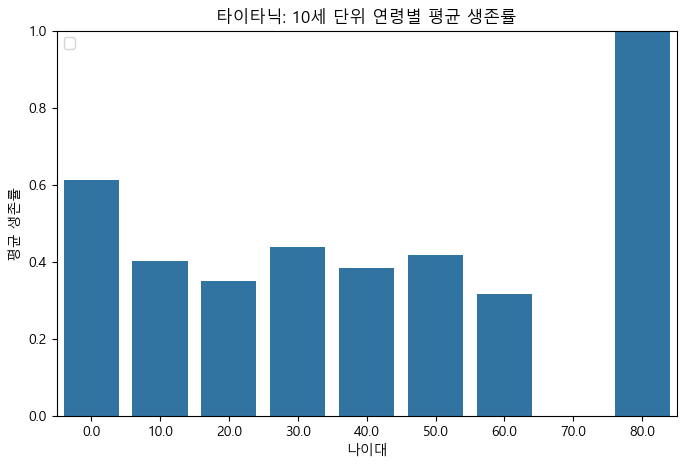

In [27]:

import seaborn as sns
import matplotlib.pyplot as plt
df['AgeGroup'] = (df['Age'] // 10) * 10  # 10단위로 그룹화


plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Survived', data=df, ci=None)
plt.xlabel('나이대')
plt.ylabel('평균 생존률')
plt.title('타이타닉: 10세 단위 연령별 평균 생존률')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [10]:
# 7. 2등급 객실에 탑승한 승객의 평균 운임을 계산하여 출력

# 2등급 객실(Pclass=2) 승객만 추출
pclass2 = df[df['Pclass'] == 2]

# 평균 운임 계산
mean_fare = pclass2['Fare'].mean()

print(f"2등급 객실 탑승 승객의 평균 운임: {mean_fare:.2f}")


2등급 객실 탑승 승객의 평균 운임: 20.66


In [13]:
# 8. 승객 중 나이가 가장 많은 사람의 나이와 이름을 출력

# 가장 나이가 많은 승객의 나이 찾기
max_age = df['Age'].max()

# 해당 나이에 해당하는 승객(들) 정보 출력
oldest_passenger = df[df['Age'] == max_age][['Name', 'Age']]

print(oldest_passenger)

                                             Name   Age
PassengerId                                            
631          Barkworth, Mr. Algernon Henry Wilson  80.0


In [14]:
# 9. S 항구에서 탑승한 승객의 수를 출력

# S 항구에서 탑승한 승객의 수 세기
num_s_port = df[df['Embarked'] == 'S'].shape[0]

print(f"S 항구에서 탑승한 승객의 수: {num_s_port}")

S 항구에서 탑승한 승객의 수: 644


In [15]:
# 10. 3등급 객실에 탑승한 남성 승객 중 생존자의 수를 출력

survived_male_pclass3 = df[(df['Pclass'] == 3) & (df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]

survived_male_pclass3

47

- 고급문제

In [ ]:
# 1. 생존자(Survived)와 그렇지 않은 사람들의 `Pclass`(객실 등급)별 평균 나이를 각각 출력

In [ ]:
# 2. `SibSp`(형제/배우자 수)가 3 이상인 승객들 중에서, `Fare`(운임) 상위 5명의 이름과 나이를 출력

In [ ]:
# 3. 승객 중에서 `Age` 값이 결측치(NaN)인 사람들의 `Embarked`(탑승 항구)별 분포를 출력

In [ ]:
# 4. 나이가 16세 미만이고, 혼자 탑승한(`SibSp == 0` and `Parch == 0`) 승객의 이름과 성별, 생존 여부를 출력

In [ ]:
# 5. 1등급(Pclass == 1) 객실에 탑승한 승객들 중에서, 운임(Fare)이 평균보다 높은 사람들의 이름과 나이, 운임을 출력

In [ ]:
# 6. 나이(Age), 객실 등급(Pclass), 운임(Fare) 값에 결측치가 없는 승객들만 대상으로, 각 등급별 평균 운임과 중앙값 운임을 출력

In [ ]:
# 7. 승객들의 `Embarked` 별 평균 나이를 계산하고, 가장 많은 승객이 탑승한 항구를 기준으로 생존율을 계산하여 출력

In [ ]:
# 8. 승객 중에서 여성(`Sex == 'female'`)이면서 30세 이상인 사람들의 생존율을 계산하여 출력

In [ ]:
# 9. 동반한 형제 또는 배우자 수(`SibSp`)와 부모 또는 자녀 수(`Parch`)의 합이 3 이상인 승객들만을 대상으로, 그들의 생존율을 계산하여 출력

In [ ]:
# 10. `Cabin`(객실 번호) 정보가 있는 승객들만을 대상으로, 그들의 생존율을 객실 등급별로 구분하여 계산하여 출력